### Recordatorio:
- Debes ejecutar la siguiente celda para poder jugar con lo que tenemos preparado
- Para ejecutar una celda la tienes que seleccionar y pulsar: Ctrl + Enter (Shift + Enter también vale)
- Cuando la hayas ejecutado, para iniciar el modo presentación teclea: alt + R
- Con las teclas de AvPág y RePág, adelantas o retrocedes en la presentación
- En Chrome puedes habilitar el modo a pantalla completa con: F11
- Para salir del modo presentación vuelve a teclear: alt + R

In [1]:
#@title Módulos (o librerías, o paquetes) que hay que cargar previamente
# Si no ejecutas esta celda no vas a poder interactuar con las celdas que vendrán a continuación
from IPython.display import IFrame
from IPython.display import Image
from IPython.display import Audio
from IPython.display import YouTubeVideo
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:85% !important; }</style>"))
js = "<script>hoy = new Date();var eta_ms = new Date(hoy.getFullYear(), hoy.getMonth(), hoy.getDate(), 19, 13).getTime() - Date.now();var timeout = setTimeout(function(){alert('Héctor, quizá podrías dejar tranquilita ya a la gente, ¿no? Gracias :)');}, eta_ms);</script>"
display(HTML(js))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
import matplotlib.mlab as ml
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interactive
import scipy.io.wavfile as wavfile # sirve para leer ficheros WAV: https://docs.scipy.org/doc/scipy/reference/tutorial/io.html#module-scipy.io.wavfile
import scipy.signal as sig # hilbert, espectrograma, chirp
import pywt # sirve para la transformada de wavelet: pip install PyWavelets
import pandas as pd
import urllib.request
import warnings
warnings.filterwarnings('ignore')
class displayhoriz(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">{1}</div>"""
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

# Tema 2.- Cuantificación y percepción
- Niveles acústicos
- Filtros y bandas
- Percepción del sonido
- Evaluación del sonido: ponderaciones

## Objetivos
- Definir algunas magnitudes importantes: niveles, magnitudes energéticas, etc.
- Introducir conceptos básicos sobre percepción
- Dar una introducción al análisis subjetivo del ruido
- Conocer las ponderaciones más empleadas


## Niveles acústicos
Uso de la escala logarítmica

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/es_sound_Presure_Level_400x399.jpg" style="float:right;width:50%;padding:2%;">



### Potencia e intensidad acústica
**Nivel de potencia acústica [dB]**

$$ L_W = 10 \, \mathrm{log} \left[ \frac{W}{W_0} \right] \; \mathrm{(dB)} $$

se toma $W_0=10^{-12}\, \mathrm{W}$ como umbral de audición

**Nivel de intensidad acústica [dB]**

$$ L_I = 10 \, \mathrm{log} \left[ \frac{I}{I_0} \right] \; \mathrm{(dB)} $$

se toma $I_0=10^{-12}\, \mathrm{W/m^2}$ como umbral de audición



La **intensidad acústica** se define como:

$$ I=p\,v$$

siendo $p$ la presión sonora y $v$ la velocidad de la partícula.

En ondas planas se cumple:

$$ \frac{p}{v}=z_0=\rho c$$

siendo $z_0$ la impedancia acústica específica.

Por tanto la intensidad acústica es proporcional a $p^2$.

**Nivel de presión sonora [dB]**

$$ L_p = 10 \, \mathrm{log} \left[ \frac{p^2}{p_0^2} \right] = 20 \, \mathrm{log} \left[ \frac{p}{p_0} \right] \; \mathrm{(dB)} $$

se toma $p_0=2 \cdot 10^{-5}\, \mathrm{Pa}$


### Suma de niveles

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/SumaDeNiveles.jpg" style="float:right;width:70%;padding:2%;">


### Resta de niveles

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/RestaDeNiveles.jpg" style="float:right;width:70%;padding:2%;">


### Suma de varios de niveles

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/SumaVariosNiveles.jpg" style="float:right;width:70%;padding:2%;">


## Filtros y bandas
<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/FiltrosBandas.jpg" style="float:right;width:70%;padding:2%;">



### Representación en bandas: Intervalo

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/Intervalo.jpg" style="float:right;width:70%;padding:2%;">


### Bandas <a href="https://law.resource.org/pub/us/cfr/ibr/002/ansi.s1.11.2004.pdf">normalizadas</a>:</h3>

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/BandasNormalizadas.jpg" style="float:right;width:70%;padding:2%;">


### Ejemplo

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/RepresentacionBandas.jpg" style="float:right;width:70%;padding:2%;">


En escala logarítmica:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/RepresentacionBandasLog.jpg" style="float:right;width:70%;padding:2%;">


## Percepción del sonido
Sistema auditivo:
- Oído externo
- Oído medio
- Oído interno

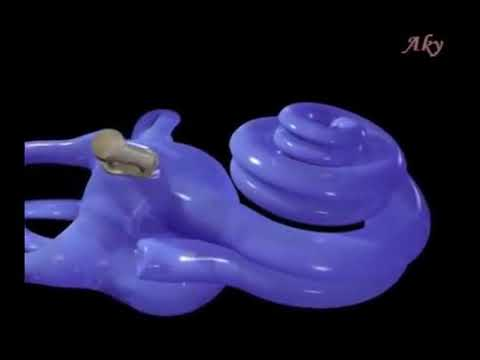

In [2]:
# FISIOLOGÍA DE LA AUDICIÓN, 6 min 45 seg
vid = YouTubeVideo("aTVrMP1RIPk")
display(vid)

### Características de la audición
Umbrales:
- Silencio
- Riesgo de daño
- Dolor

Dependencia con:
- Frecuencia
- Edad
- Individuo
- Necesidad de estadísticas

Condiciones de medida:
- Ausencia de reflexiones
- Audición binaural

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/Umbrales.jpg" style="float:right;width:60%;padding:2%;">


### Niveles de los sonidos
- La magnitud de un nivel es proporcional al logaritmo del estímulo
- Límite del dolor: $1\, \mathrm{W/m^2}\, (120\, \mathrm{dB})$

**Fon:**
"Sensación" de intensidad dada por una senoide (de $1\, \mathrm{kHz}$) de esa intensidad física

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/CurvasIsofonicas.jpg" style="float:right;width:45%;padding:1%;"/>


### Enmascaramiento
Modificación del límite de audibilidad por presencia de señales parásitas

Características:
- Influencia del contenido espectral
- Superposición para ruidos de banda ancha
- Suma de sonoridades: solo es posible si las frecuencias están bien separadas

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/Enmascaramiento01.gif" style="float:right;width:45%;padding:2%;">
</div>

Enmascaramiento entre tonos puros:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/Enmascaramiento02.gif" style="float:right;width:50%;padding:2%;">


## Evaluación del sonido: ponderación
Ponderaciones
- Se pondera para contemplar la respuesta del oído: existen diferentes ponderaciones que actúan sobre el nivel de presión acústica en toda la banda.

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/Ponderaciones.jpg" style="float:right;width:70%;padding:2%;">


### Ponderación A
Similar a la respuesta del oído (isofónica de 40 fonos)

$$ W_A = 10 \, \mathrm{log} \left[ \frac{1.562 f^4}{\left( f^2 + 107.65^2 \right)\left( f^2 + 737.86^2 \right)} \right] + 10 \, \mathrm{log} \left[ \frac{2.243 \cdot 10^{16} f^4}{\left( f^2 + 20.60^2 \right)^2\left( f^2 + 12194.22^2 \right)^2} \right] $$

Curva isofónica de 40 fon, invertida, y comparada con la ponderación A:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/PonderacionA.jpg" style="float:center;width:50%;padding:2%;">


### Ponderaciones B y C
- Ponderación B: respuesta del oído (isofónica de 70 fonos)

$$ W_B = 10 \, \mathrm{log} \left[ \frac{1.025 f^2}{\left( f^2 + 158.49^2 \right)} \right] + 10 \, \mathrm{log} \left[ \frac{2.243 \cdot 10^{16} f^4}{\left( f^2 + 20.60^2 \right)^2\left( f^2 + 12194.22^2 \right)^2} \right] $$

- Ponderación C: respuesta del oído (isofónica de 100 fonos)

$$ W_C = 10  \, \mathrm{log} \left[ \frac{2.243 \cdot 10^{16} f^4}{\left( f^2 + 20.60^2 \right)^2\left( f^2 + 12194.22^2 \right)^2} \right] $$


### Ejemplo
Banda estrecha

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/PonderacionesEjBandaEstrecha.jpg" style="float:center;width:70%;padding:2%;">


Aplicación en bandas: tercios de octava

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/TablaTerciosOctava.jpg" style="float:center;width:70%;padding:2%;">


Tercios de octava

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema02/PonderacionesEjTerciosOctava.jpg" style="float:center;width:70%;padding:2%;">


## Ejercicios
Resuelve los siguientes ejercicios en las celdas habilitadas para ello.

Instrucciones:

Puede haber 3 tipos de celdas:
- Ya completadas: no tienes que escribir nada. Son celdas que ya tienen la solución a lo que se pregunta pero puede ser interesante ver lo que hay escrito por si te sirve para completar celdas siguientes.
- Parcialmente completadas: tienes que quitar los símbolos de comentario (#) para habilitar el código y reemplazar RELLENA-AQUI con lo que consideres oportuno.
- Vacías: tienes que escribir tú todo el código. Muchas veces se puede hacer usando de forma inteligente "copiar-pegar" de celdas anteriores o de código de celdas vistas en el tema de teoría.

### Ejercicio 2.1.
¿Cuál es el nivel de presión sonora en un punto donde hay una fuente puntual que origina una fluctuación de la presión de 1 Pa de valor cuadrático medio (RMS)?

Ya sabemos que <a href="https://www.google.com/search?q=1+pascal+to+db+spl">Google</a> lo sabe todo; pero seguro que consigues encontrar la expresión de donde sale ese resultado.

In [3]:
# Escribe en esta celda la solución

### Ejercicio 2.2.
Se pide:
- ¿Cuál es el nivel de presión sonora en un punto donde hay dos fuentes puntuales que originan unos niveles de presión sonora de 84 y 80 dB respectivamente?
- ¿Qué aumento de decibelios se produce respecto a la fuente mayor?
- Verifica los resultados con la gráfica de suma de niveles vista en clase.

In [4]:
# Escribe en esta celda la solución

### Ejercicio 2.3.
La medida del nivel de presión sonora en un punto cuando una máquina está funcionando con ruido de fondo es de 87 dB. Con la máquina apagada se mide un nivel de 80 dB.

Se pide:
- ¿Cuál es el nivel de presión sonora que genera la máquina?
- Verifica los resultados con la gráfica de resta de niveles vista en clase.

In [5]:
# Escribe en esta celda la solución

**¿Qué debes haber aprendido al hacer los ejercicios?**
- A calcular niveles de presión sonora a partir de las fluctuaciones de la presión.
- A sumar niveles de presión sonora de forma matemática y de forma gráfica.
- A restar niveles de presión sonora de forma matemática y de forma gráfica.

## Fin del tema

## Solucionario

In [6]:
# Solución Ejercicio 2.1
# Datos:
p = 1 # Pa
p0 = 0.00002 # Pa (nivel de referencia)
# De la definición de nivel de presión sonora:
Lp = 20 * np.log10(p/p0)
print('Nivel de presión sonora: {0:.2f} dB'.format(Lp))

Nivel de presión sonora: 93.98 dB


In [7]:
# Solución Ejercicio 2.2
# Datos:
Lp1 = 84 # dB
Lp2 = 80 # dB
p0 = 0.00002 # Pa (nivel de referencia)
# Sabemos que los niveles de presión sonora no son aditivos.
# Lo que sí se puede sumar directamente es la intensidad acústica: It = I1 + I2
# Obtenemos la presión acústica a partir del nivel de presión sonora:
p1 = np.power(10, Lp1/20) * p0
p2 = np.power(10, Lp2/20) * p0
# Sabemos que la intensidad acústica es proporcional al cuadrado de la presión acústica.
k = 10 # es arbitrario este valor; puedes probar con otros que en este caso no cambia
I1 = k * np.power(p1, 2)
I2 = k * np.power(p2, 2)
It = I1 + I2
pt = np.power(It/k, 0.5)
Lpt = 20 * np.log10(pt/p0)
print('Nivel de presión sonora total: {0:.2f} dB'.format(Lpt))
print('Para una diferencia de niveles de {0:.2f} dB, hay un aumento respecto a la fuente mayor de {1:.2f} dB'.format(np.abs(Lp1-Lp2), Lpt - np.max([Lp1, Lp2])))

Nivel de presión sonora total: 85.46 dB
Para una diferencia de niveles de 4.00 dB, hay un aumento respecto a la fuente mayor de 1.46 dB


In [8]:
# Solución Ejercicio 2.3
# Datos:
Lp_maqyfondo = 87 # dB
Lp_fondo = 80 # dB
p0 = 0.00002 # Pa (nivel de referencia)
# Sabemos que los niveles de presión sonora no son aditivos.
# Lo que sí se puede sumar directamente es la intensidad acústica: It = I1 + I2
# Obtenemos la presión acústica a partir del nivel de presión sonora:
p_maqyfondo = np.power(10, Lp_maqyfondo/20) * p0
p_fondo = np.power(10, Lp_fondo/20) * p0
# Sabemos que la intensidad acústica es proporcional al cuadrado de la presión acústica.
k = 10 # es arbitrario este valor; puedes probar con otros que en este caso no cambia
I_maqyfondo = k * np.power(p_maqyfondo, 2)
I_fondo = k * np.power(p_fondo, 2)
I_maq = I_maqyfondo - I_fondo
p_maq = np.power(I_maq/k, 0.5)
Lp_maq = 20 * np.log10(p_maq/p0)
print('Nivel de presión sonora de la máquina: {0:.2f} dB'.format(Lp_maq))
print('Diferencia de niveles de {0:.2f} dB: Decibelios a restar a la fuente mayor: {1:.2f} dB'.format(Lp_maqyfondo-Lp_fondo, Lp_maqyfondo-Lp_maq))

Nivel de presión sonora de la máquina: 86.03 dB
Diferencia de niveles de 7.00 dB: Decibelios a restar a la fuente mayor: 0.97 dB


## Material de ampliación
La siguiente información no es imprescindible para seguir la asignatura

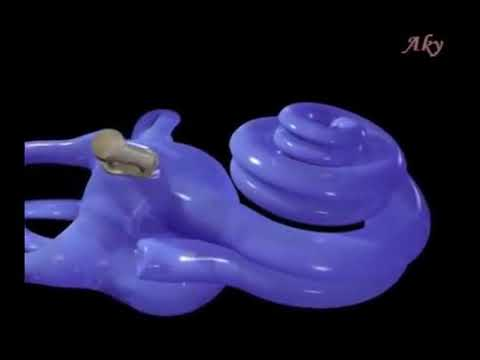

In [9]:
# FISIOLOGÍA DE LA AUDICIÓN, 6 min 45 seg, sencillo
vid = YouTubeVideo("aTVrMP1RIPk")
display(vid)

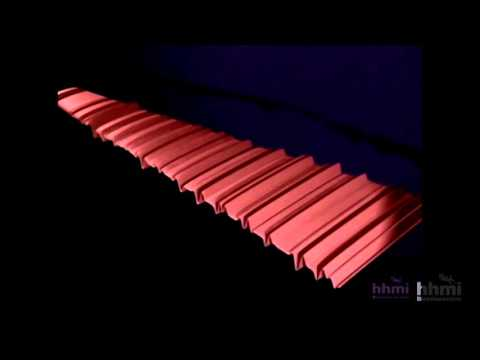

In [10]:
# La cóclea, 1 min 30 seg, recomendable
vid = YouTubeVideo("lzOlBAhawaM")
display(vid)

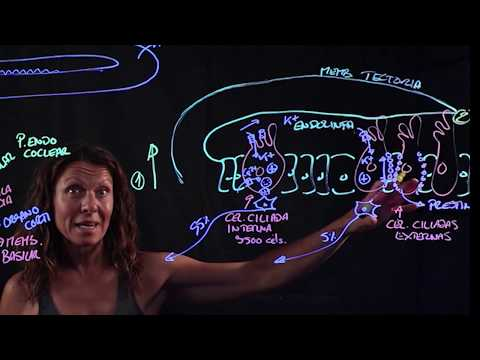

In [11]:
# FISIOLOGÍA DE LA AUDICIÓN, 12 min, muy completo y técnico
vid = YouTubeVideo("Brq3JVfLpX0")
display(vid)

In [12]:
# Tocando una nota musical
f1 = 440 # Hz
A = 1 # amplitud de la onda
tmax = 1 # s duración de la onda
fs = 44000 # Hz sampling frequency, frecuencia de muestreo
npuntos = int(fs * tmax) # [-] número de puntos de mi señal
t = np.linspace(0, tmax, npuntos) # vector de tiempos
tau = 0.5
# Diseñamos una exponencial decreciente
y = np.exp(-t/tau)
signal1 = A * np.sin(2 * np.pi * f1 * t) # tono puro
signal2 = y * (A * np.sin(2 * np.pi * f1 * t)) # tono puro decreciendo en el tiempo
signal3 = A * np.sin(2 * np.pi * f1 * t) # tono puro
for armon in range(1,7):
    signal3 = signal3 + A * np.sin(2 * np.pi * armon*f1 * t) # añadimos armónicos a la señal 3
signal3 = y * signal3

display('Tono puro, Tono puro (decreciendo en el tiempo), Tono puro junto con 7 armónicos (decreciendo en el tiempo):')
displayhoriz('Audio(signal1, rate=fs)', 'Audio(signal2, rate=fs)', 'Audio(signal3, rate=fs)')


'Tono puro, Tono puro (decreciendo en el tiempo), Tono puro junto con 7 armónicos (decreciendo en el tiempo):'

Audio(signal1, rate=fs)
<IPython.lib.display.Audio object>

Audio(signal2, rate=fs)
<IPython.lib.display.Audio object>

Audio(signal3, rate=fs)
<IPython.lib.display.Audio object>

In [13]:
# Tocando una sucesión de notas
# Conviene definir una función en python cuando se va a utilizar muchas veces unas líneas para producir un resultado
# La función puede tener argumentos, que modifican el resultado, y se pasan entre paréntesis
def playnota(frec, dur, armonmax, fs):
    A = 1 # amplitud de la onda
    npuntos = int(fs * dur) # [-] número de puntos de mi señal
    t = np.linspace(0, dur, npuntos) # vector de tiempos
    tau = 0.5
    # Diseñamos una exponencial decreciente
    y = np.exp(-t/tau)
    signal = A * np.sin(2 * np.pi * frec * t) # tono puro
    for armon in range(1,armonmax):
        signal = signal + A * np.sin(2 * np.pi * armon*frec * t) # añadimos armónicos a la señal 3
    signal = y * signal
    return signal

fs = 44000 # Hz sampling frequency, frecuencia de muestreo
tmax = 0.5
Narmonicos = 7

# Escala diatónica en la tercera octava: https://en.wikipedia.org/wiki/Diatonic_scale y https://en.wikipedia.org/wiki/Piano_key_frequencies
Do3 = playnota(130.81, tmax, Narmonicos, fs)
Re3 = playnota(146.83, tmax, Narmonicos, fs)
Mi3 = playnota(164.81, tmax, Narmonicos, fs)
Fa3 = playnota(174.61, tmax, Narmonicos, fs)
Sol3 = playnota(196.00, tmax, Narmonicos, fs)
La3 = playnota(220.00, tmax, Narmonicos, fs)
Si3 = playnota(246.94, tmax, Narmonicos, fs)


displayhoriz('Audio(Do3, rate=fs)', 'Audio(Re3, rate=fs)', 'Audio(Mi3, rate=fs)', 'Audio(Fa3, rate=fs)','Audio(Sol3, rate=fs)', 'Audio(La3, rate=fs)', 'Audio(Si3, rate=fs)')


Audio(Do3, rate=fs)
<IPython.lib.display.Audio object>

Audio(Re3, rate=fs)
<IPython.lib.display.Audio object>

Audio(Mi3, rate=fs)
<IPython.lib.display.Audio object>

Audio(Fa3, rate=fs)
<IPython.lib.display.Audio object>

Audio(Sol3, rate=fs)
<IPython.lib.display.Audio object>

Audio(La3, rate=fs)
<IPython.lib.display.Audio object>

Audio(Si3, rate=fs)
<IPython.lib.display.Audio object>

In [14]:
# Concatenando vectores en numpy: nuestra primera "canción"
himno_alegria = np.concatenate([Mi3, Mi3, Fa3, Sol3, Sol3, Fa3, Mi3, Re3, Do3, Do3, Re3, Mi3, Mi3, Re3,
                               Mi3, Mi3, Fa3, Sol3, Sol3, Fa3, Mi3, Re3, Do3, Do3, Re3, Mi3, Re3, Do3])
Audio(himno_alegria, rate=fs)

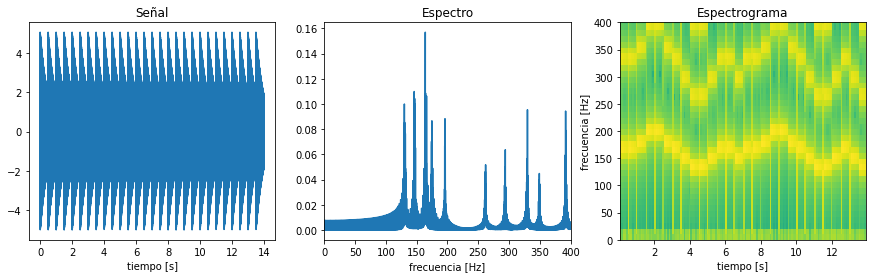

In [16]:
# Gráficas:
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
N = len(himno_alegria)
t = np.linspace(0,N/fs,N)
ax1.plot(t,himno_alegria)
# Cálculo de las transformadas de Fourier
tf_himno = np.fft.fft(himno_alegria)/N
frec = np.fft.fftfreq(N, 1/fs)
ax2.plot(frec[0:N//2],np.abs(tf_himno[0:N//2]))
tamanyo_ventana = 2**12
solape_ventana = 0
f1, t1, Sxx1 = sig.spectrogram(himno_alegria, fs, window=sig.get_window('hann', tamanyo_ventana), noverlap=solape_ventana)
ax3.pcolormesh(t1, f1, np.log10(Sxx1))
ax1.set_title('Señal')
ax1.set_xlabel('tiempo [s]')
ax2.set_title('Espectro')
ax2.set_xlabel('frecuencia [Hz]')
ax2.set_xlim([0,400])
ax3.set_title('Espectrograma')
ax3.set_xlabel('tiempo [s]')
ax3.set_ylabel('frecuencia [Hz]')
ax3.set_ylim([0,400]);